In [264]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns

In [265]:
file_beef = Path("Beef84_22.csv")
file_eggs = Path("Eggs80_22.csv")
file_bread = Path("Bread80_22.csv")
file_chicken = Path("Chicken80_22.csv")
file_diesel = Path("Diesel98_22s.csv")
file_electric = Path("Electricity79_22.csv")
file_energy = Path("Energy00_22.csv")
file_flour = Path("Flour80_22.csv")
file_fuel = Path("Fuel79_22.csv")
file_gas = Path("Gasoline80_22.csv")
file_malt = Path("Malt96_22.csv")
file_medical = Path("Medical00_22.csv")
file_milk = Path("Milk95_22.csv")
file_pres = Path("Prescription80_22.csv")
file_shelter = Path("Shelter80_22.csv")
file_sugar = Path("Sugar80_22.csv")
file_utility = Path("Utility00_22.csv")

file_cpi = Path("CPI_Average.csv")

In [266]:

beef_file = pd.read_csv(file_beef)
eggs_file = pd.read_csv(file_eggs)
bread_file = pd.read_csv(file_bread)
chicken_file = pd.read_csv(file_chicken)
diesel_file = pd.read_csv(file_diesel)
electricity_file = pd.read_csv(file_electric)
energy_file = pd.read_csv(file_energy)
flour_file = pd.read_csv(file_flour)
fuel_file = pd.read_csv(file_fuel)
gasoline_file = pd.read_csv(file_gas)
malt_file = pd.read_csv(file_malt)
medical_file = pd.read_csv(file_medical)
milk_file = pd.read_csv(file_milk)
presecription_file = pd.read_csv(file_pres)
shelter_file = pd.read_csv(file_shelter)
sugar_file = pd.read_csv(file_sugar)
utility_file = pd.read_csv(file_utility)

CPI_file = pd.read_csv(file_cpi)

In [267]:
df_beef = pd.DataFrame(beef_file)
df_beef.set_index(pd.to_datetime(df_beef['Year'], infer_datetime_format=True), inplace=True)
df_beef = df_beef.drop(columns=['Year'], axis=1)
df_beef = df_beef.pct_change()

df_eggs = pd.DataFrame(eggs_file)
df_eggs.set_index(pd.to_datetime(df_eggs['Year'], infer_datetime_format=True), inplace=True)
df_eggs = df_eggs.drop(columns=['Year'], axis=1)
df_eggs = df_eggs.pct_change()

df_bread = pd.DataFrame(bread_file)
df_bread.set_index(pd.to_datetime(df_bread['Year'], infer_datetime_format=True), inplace=True) 
df_bread = df_bread.drop(columns=['Year'], axis=1)
df_bread = df_bread.pct_change()

df_chicken = pd.DataFrame(chicken_file)
df_chicken.set_index(pd.to_datetime(df_chicken['Year'], infer_datetime_format=True), inplace=True)
df_chicken = df_chicken.drop(columns=['Year'], axis=1)
df_chicken  = df_chicken .pct_change()

df_diesel = pd.DataFrame(diesel_file)
df_diesel.set_index(pd.to_datetime(df_diesel ['Year'], infer_datetime_format=True), inplace=True)
df_diesel  = df_diesel .drop(columns=['Year'], axis=1)
df_diesel = df_diesel.pct_change()

df_electric = pd.DataFrame(electricity_file)
df_electric.set_index(pd.to_datetime(df_electric['Year'], infer_datetime_format=True), inplace=True)
df_electric = df_electric.drop(columns=['Year'], axis=1)
df_electric = df_electric.pct_change()

df_energy = pd.DataFrame(energy_file)
df_energy.set_index(pd.to_datetime(df_energy['Year'], infer_datetime_format=True), inplace=True)
df_energy = df_energy.drop(columns=['Year'], axis=1)
df_energy = df_energy.pct_change()


df_flour = pd.DataFrame(flour_file)
df_flour.set_index(pd.to_datetime(df_flour['Year'], infer_datetime_format=True), inplace=True)
df_flour = df_flour.drop(columns=['Year'], axis=1)
df_flour = df_flour.pct_change()


df_fuel = pd.DataFrame(fuel_file)
df_fuel.set_index(pd.to_datetime(df_fuel['Year'], infer_datetime_format=True), inplace=True)
df_fuel = df_fuel.drop(columns=['Year'], axis=1)
df_fuel = df_fuel.pct_change()

df_gas = pd.DataFrame(gasoline_file)
df_gas.set_index(pd.to_datetime(df_gas['Year'], infer_datetime_format=True), inplace=True)
df_gas = df_gas.drop(columns=['Year'], axis=1)
df_gas = df_gas.pct_change()


df_malt = pd.DataFrame(malt_file)
df_malt.set_index(pd.to_datetime(df_malt['Year'], infer_datetime_format=True), inplace=True)
df_malt = df_malt.drop(columns=['Year'], axis=1)
df_malt = df_malt.pct_change()


df_medical = pd.DataFrame(medical_file)
df_medical.set_index(pd.to_datetime(df_medical['Year'], infer_datetime_format=True), inplace=True)
df_medical = df_medical.drop(columns=['Year'], axis=1)
df_medical = df_medical.pct_change()


df_milk = pd.DataFrame(milk_file)
df_milk.set_index(pd.to_datetime(df_milk['Year'], infer_datetime_format=True), inplace=True)
df_milk = df_milk.drop(columns=['Year'], axis=1)
df_milk = df_milk.pct_change()



df_pres = pd.DataFrame(presecription_file)
df_pres.set_index(pd.to_datetime(df_pres['Year'], infer_datetime_format=True), inplace=True)
df_pres = df_pres.drop(columns=['Year'], axis=1)
df_pres = df_pres.pct_change()


df_shelter = pd.DataFrame(shelter_file)
df_shelter.set_index(pd.to_datetime(df_shelter ['Year'], infer_datetime_format=True), inplace=True)
df_shelter  = df_shelter.drop(columns=['Year'], axis=1)
df_shelter = df_shelter.pct_change()

df_sugar = pd.DataFrame(sugar_file)
df_sugar.set_index(pd.to_datetime(df_sugar['Year'], infer_datetime_format=True), inplace=True)
df_sugar = df_sugar.drop(columns=['Year'], axis=1)
df_sugar = df_sugar.pct_change()

df_utility = pd.DataFrame(utility_file)
df_utility.set_index(pd.to_datetime(df_utility['Year'], infer_datetime_format=True), inplace=True) 
df_utility = df_utility.drop(columns=['Year'], axis=1)
df_utility  = df_utility .pct_change()

df_cpi = pd.DataFrame(CPI_file)
df_cpi.set_index(pd.to_datetime(df_cpi['Year'], infer_datetime_format=True), inplace=True) 
df_cpi = df_cpi.drop(columns=['Year'], axis=1)
df_cpi  = df_cpi.pct_change()


In [268]:
df_inflation = pd.concat([df_beef , df_chicken,df_eggs, df_bread,df_diesel,df_electric,df_energy,df_flour,df_fuel, df_gas,df_malt, df_medical, df_milk,df_utility,df_sugar, df_shelter, df_cpi], axis="columns", join = "inner")

In [269]:
def fill_missing(values):
    one_month = 30
    for row in range(df_inflation.shape[0]):
        for col in range(df_inflation.shape[1]):
            if np.isnan(values[row][col]):
                values[row,col] = values[row-one_month,col]
df_inflation = df_inflation.astype('float32')
fill_missing(df_inflation.values)
df_inflation.isnull().sum()

Beef             0
Chicken          0
Eggs             0
Bread            0
Diesel           0
Electric79_22    0
Energy           0
Flour            0
Fuel             0
Gasoline         0
Malt             0
Medical          0
Milk             0
Utility          0
Sugar            0
Shelter          0
CPI              0
dtype: int64

In [270]:
df_inflation.reset_index(inplace=True)

In [271]:
df_inflation.dtypes

Year             datetime64[ns]
Beef                    float32
Chicken                 float32
Eggs                    float32
Bread                   float32
Diesel                  float32
Electric79_22           float32
Energy                  float32
Flour                   float32
Fuel                    float32
Gasoline                float32
Malt                    float32
Medical                 float32
Milk                    float32
Utility                 float32
Sugar                   float32
Shelter                 float32
CPI                     float32
dtype: object

In [272]:
df_inflation['Year'] = df_inflation['Year'].astype('object')
df_inflation.dtypes

Year              object
Beef             float32
Chicken          float32
Eggs             float32
Bread            float32
Diesel           float32
Electric79_22    float32
Energy           float32
Flour            float32
Fuel             float32
Gasoline         float32
Malt             float32
Medical          float32
Milk             float32
Utility          float32
Sugar            float32
Shelter          float32
CPI              float32
dtype: object

In [273]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df_inflation['Year'])
train_dates.tail() #Check last few dates. 

264   2022-01-01
265   2022-02-01
266   2022-03-01
267   2022-04-01
268   2022-05-01
Name: Year, dtype: datetime64[ns]

In [274]:
#Variables for training
cols = list(df_inflation)[1:17]

In [275]:
#Date and volume columns are not used in training. 
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

['Beef', 'Chicken', 'Eggs', 'Bread', 'Diesel', 'Electric79_22', 'Energy', 'Flour', 'Fuel', 'Gasoline', 'Malt', 'Medical', 'Milk', 'Utility', 'Sugar', 'Shelter']


In [276]:
df_for_training = df_inflation[cols].astype(float)

In [277]:
df_for_training

,Beef,Chicken,Eggs,Bread,Diesel,Electric79_22,Energy,Flour,Fuel,Gasoline,Malt,Medical,Milk,Utility,Sugar,Shelter
0,-0.029450,0.005698,0.059783,0.008899,0.025792,-0.011765,-0.006073,0.071161,0.092831,0.003587,0.058419,0.002291,-0.031304,0.002003,0.025822,0.007953
1,0.022252,-0.012276,-0.013333,0.018743,0.123563,0.011905,0.034930,-0.066434,0.357443,0.048257,-0.046537,0.005970,-0.002873,0.020937,-0.011442,0.004734
2,0.010554,0.017208,-0.032225,0.000000,0.014706,0.000000,0.050145,0.067416,-0.157993,0.115942,0.069239,0.003956,-0.010443,-0.005859,-0.006944,0.006283
3,0.033943,0.004699,0.008593,0.003247,-0.038437,0.000000,-0.010101,-0.007018,-0.053716,-0.022918,-0.057325,0.001970,0.009098,0.000000,-0.034965,0.000520
4,-0.008838,-0.015903,-0.092652,-0.012945,-0.009174,0.000000,0.001855,0.067138,-0.017885,-0.002346,0.052928,0.002950,0.003246,0.008841,0.024155,0.000520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,-0.010860,0.009963,0.078859,0.015013,0.003824,0.035211,0.018268,0.092784,0.096718,0.000796,0.008940,0.009266,0.011755,0.029073,0.021708,0.003994
265,0.016689,0.006165,0.039399,0.014791,0.060952,0.006803,0.025413,0.009434,0.074682,0.053520,0.024051,0.003491,0.023237,0.000597,0.016997,0.005846
266,0.027430,0.056373,0.020449,0.018378,0.235701,0.013514,0.105373,0.046729,0.214391,0.197870,0.004944,0.005085,0.010839,0.014263,0.029248,0.005836
267,0.033424,0.040603,0.231672,0.003111,0.062474,0.006667,0.001888,0.015625,0.043628,-0.010087,-0.004305,0.003156,0.024253,0.010226,0.001353,0.005109


<AxesSubplot:>

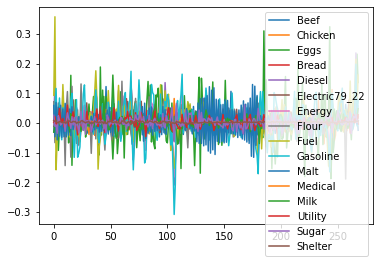

In [278]:
df_for_plot=df_for_training.tail(5000)
df_for_plot.plot.line()

In [279]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training_scaled

array([[-1.28322504,  0.14033532,  0.75005645, ..., -0.06160653,
         1.25894562,  2.60720954],
       [ 0.66479529, -0.60832372, -0.28241263, ...,  1.1968917 ,
        -0.73166714,  1.12012794],
       [ 0.22403984,  0.61977761, -0.54917495, ..., -0.58422779,
        -0.49142529,  1.8354318 ],
       ...,
       [ 0.859875  ,  2.2510791 ,  0.19462546, ...,  0.75325353,
         1.44198032,  1.62888927],
       [ 1.08573743,  1.59424126,  3.17729759, ...,  0.48491926,
        -0.04816391,  1.29337686],
       [-1.10865238,  0.59953406,  1.82789002, ...,  1.60609953,
         0.24049665,  1.83830733]])

In [280]:
trainX = []
trainY = []

In [281]:
n_future = 1
n_past =  14

In [282]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [283]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [284]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (255, 14, 16).
trainY shape == (255, 1).


In [285]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [286]:
model = Sequential()
model.add(LSTM(500, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(250, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [287]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 14, 500)           1034000   
                                                                 
 lstm_17 (LSTM)              (None, 250)               751000    
                                                                 
 dropout_8 (Dropout)         (None, 250)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 251       
                                                                 
Total params: 1,785,251
Trainable params: 1,785,251
Non-trainable params: 0
_________________________________________________________________


In [288]:
history = model.fit(trainX, trainY, epochs=500, batch_size=16, validation_split=0.8, verbose=1)

Epoch 1/500
4/4 [==============================] - 3s 281ms/step - loss: 1.2886 - val_loss: 0.9918
Epoch 2/500
4/4 [==============================] - 0s 66ms/step - loss: 1.1692 - val_loss: 0.9670
Epoch 3/500
4/4 [==============================] - 0s 49ms/step - loss: 1.0801 - val_loss: 1.0143
Epoch 4/500
4/4 [==============================] - 0s 24ms/step - loss: 1.1130 - val_loss: 1.0976
Epoch 5/500
4/4 [==============================] - 0s 25ms/step - loss: 1.0083 - val_loss: 1.1674
Epoch 6/500
4/4 [==============================] - 0s 23ms/step - loss: 1.0544 - val_loss: 1.2087
Epoch 7/500
4/4 [==============================] - 0s 25ms/step - loss: 1.0428 - val_loss: 1.1610
Epoch 8/500
4/4 [==============================] - 0s 24ms/step - loss: 1.0736 - val_loss: 1.1099
Epoch 9/500
4/4 [==============================] - 0s 25ms/step - loss: 1.0221 - val_loss: 1.0931
Epoch 10/500
4/4 [==============================] - 0s 23ms/step - loss: 0.9694 - val_loss: 1.0454
Epoch 11/500
4/4 [

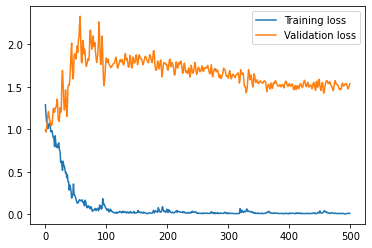

In [289]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [291]:
predicted = model.predict(trainX)

8/8 [==============================] - 1s 19ms/step


In [292]:
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(trainY.reshape(-1, 1))

ValueError: non-broadcastable output operand with shape (255,1) doesn't match the broadcast shape (255,16)

In [293]:
# Create a DataFrame of Real and Predicted values
CPI = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df_inflation.index[-len(real_prices): ]) 

# Show the DataFrame's head
CPI.head()

NameError: name 'real_prices' is not defined

In [294]:
CPI.plot(title="Actual Vs. Predicted")

NameError: name 'CPI' is not defined